In [5]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

### In this lab, we will dealing with the loan data from LendingClub platform that is publicly avaiable. This lab will be divided into 3 parts:

- The first part of the demo would focus on Decision Trees and Random Forests
- The second part would focus on cross validation and evaluation techniques
- The last part would focus on a parametric model Logistic Regression

## Decison Trees Demo

The emphasis will be on the basics and understanding the resulting decision tree. I will cover:

 - Importing the data using pandas as before,
 - Using pandas to prep the data for the scikit-leaarn decision tree code,
 - Drawing the tree, and
 - Evaluation

In [6]:
df = pd.read_csv('/Volumes/GoogleDrive/My Drive/Spring 19/CSE 494 Labs/Lab 3/loan_data_sample.csv')
# df.to_csv('../../data/lab3/loan_data_sample.csv')
df.head()

,Unnamed: 0,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


#### Here are what the columns in the data set represent:

- credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
- int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
- installment: The monthly installments owed by the borrower if the loan is funded.
- log.annual.inc: The natural log of the self-reported annual income of the borrower.
- dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
- fico: The FICO credit score of the borrower.
- days.with.cr.line: The number of days the borrower has had a credit line.
- revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
- revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
- inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
- delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
- pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).
- not.fully.paid: The quantity of interest for classification - whether the borrower paid back the money in full or not

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a219ab050>]],
      dtype=object)

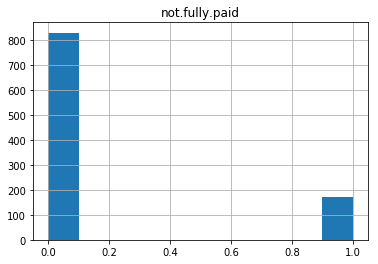

In [7]:
df.hist(column='not.fully.paid')

In [8]:
columns_to_select = ['purpose', 'installment', 'log.annual.inc', 'dti', 'days.with.cr.line', 'not.fully.paid']

In [9]:
df_sel = df[columns_to_select]
df_sel.head()

,purpose,installment,log.annual.inc,dti,days.with.cr.line,not.fully.paid
0,debt_consolidation,829.10,11.350407,19.48,5639.958333,0
1,credit_card,228.22,11.082143,14.29,2760.000000,0
2,debt_consolidation,366.86,10.373491,11.63,4710.000000,0
3,debt_consolidation,162.34,11.350407,8.10,2699.958333,0
4,credit_card,102.92,11.299732,14.97,4066.000000,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a21d1c3d0>,
      dtype=object)

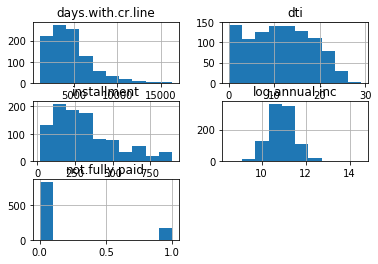

In [10]:
#doing negative filtering based off of histograms
#for negative filtering, look for a skew
df_sel.hist()

In [11]:
# Encode the purpose column with categorical values
df_sel['purpose'].value_counts()

debt_consolidation    432
all_other             229
credit_card           162
home_improvement       63
small_business         56
major_purchase         32
educational            26
Name: purpose, dtype: int64

In [12]:
df_sel = pd.concat([df_sel,pd.get_dummies(df_sel['purpose'], prefix='purpose')],axis=1)
del df_sel['purpose']



In [13]:
df_sel.head()
df_sel.shape

(1000, 12)

In [14]:
df_sel.head()

,installment,log.annual.inc,dti,days.with.cr.line,not.fully.paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,829.10,11.350407,19.48,5639.958333,0,0,0,1,0,0,0,0
1,228.22,11.082143,14.29,2760.000000,0,0,1,0,0,0,0,0
2,366.86,10.373491,11.63,4710.000000,0,0,0,1,0,0,0,0
3,162.34,11.350407,8.10,2699.958333,0,0,0,1,0,0,0,0
4,102.92,11.299732,14.97,4066.000000,0,0,1,0,0,0,0,0


In [15]:
# A final check for any missing values

df_sel.isnull().any()

installment                   False
log.annual.inc                False
dti                           False
days.with.cr.line             False
not.fully.paid                False
purpose_all_other             False
purpose_credit_card           False
purpose_debt_consolidation    False
purpose_educational           False
purpose_home_improvement      False
purpose_major_purchase        False
purpose_small_business        False
dtype: bool

#### The classification problem in this setup is a binary classification: we predict whether a loan would be fully paid given the feature set of the loans and the borrower data

So our label column here is not.fully.paid and all the other columns form the feature space


In [16]:
X = np.array(df_sel.loc[:, df_sel.columns != 'not.fully.paid'])
X.shape

(1000, 11)

In [17]:
y = np.array(df_sel['not.fully.paid'])
y.shape

(1000,)

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

In [19]:
# Start with a fixed 70-30 cross validation
# Do not train and test on same data
# Instead, split data with 70-30 split
# Train model on 70% of data
# Test model on 30% of data
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.3, random_state = 100)

In [20]:
X_train.shape

(700, 11)

In [21]:
X_test.shape

(300, 11)

In [22]:
# y_train.shape
# y_test.shape

In [23]:
# from sklearn.externals.six import StringIO  
# from IPython.display import Image  
# from sklearn.tree import export_graphviz
# import pydotplus
dtree = DecisionTreeClassifier(criterion='gini',max_depth=None)



In [24]:
dtree.fit(X_train,y_train)
# dot_data = StringIO()
# export_graphviz(dtree, out_file=dot_data,  
#                 filled=True, rounded=True,
#                 special_characters=True)
# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
# Image(graph.create_png())

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [25]:
def tree_properties(estimator):
    n_nodes = estimator.tree_.node_count
    children_left = estimator.tree_.children_left
    children_right = estimator.tree_.children_right
    feature = estimator.tree_.feature
    threshold = estimator.tree_.threshold


    # The tree structure can be traversed to compute various properties such
    # as the depth of each node and whether or not it is a leaf.
    node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
    is_leaves = np.zeros(shape=n_nodes, dtype=bool)
    stack = [(0, -1)]  # seed is the root node id and its parent depth
    while len(stack) > 0:
        node_id, parent_depth = stack.pop()
        node_depth[node_id] = parent_depth + 1

        # If we have a test node
        if (children_left[node_id] != children_right[node_id]):
            stack.append((children_left[node_id], parent_depth + 1))
            stack.append((children_right[node_id], parent_depth + 1))
        else:
            is_leaves[node_id] = True

    print("The binary tree structure has %s nodes and has "
          "the following tree structure:"
          % n_nodes)
    for i in range(n_nodes):
        if is_leaves[i]:
            print("%snode=%s leaf node." % (node_depth[i] * "\t", i))
        else:
            print("%snode=%s test node: go to node %s if X[:, %s] <= %s else to "
                  "node %s."
                  % (node_depth[i] * "\t",
                     i,
                     children_left[i],
                     feature[i],
                     threshold[i],
                     children_right[i],
                     ))
    print()

In [26]:
tree_properties(dtree)

The binary tree structure has 277 nodes and has the following tree structure:
node=0 test node: go to node 1 if X[:, 0] <= 836.9499816894531 else to node 274.
	node=1 test node: go to node 2 if X[:, 0] <= 481.90000915527344 else to node 203.
		node=2 test node: go to node 3 if X[:, 3] <= 1125.0 else to node 4.
			node=3 leaf node.
			node=4 test node: go to node 5 if X[:, 2] <= 16.505000114440918 else to node 132.
				node=5 test node: go to node 6 if X[:, 2] <= 2.3799999952316284 else to node 13.
					node=6 test node: go to node 7 if X[:, 1] <= 9.551888942718506 else to node 8.
						node=7 leaf node.
						node=8 test node: go to node 9 if X[:, 1] <= 10.10621976852417 else to node 12.
							node=9 test node: go to node 10 if X[:, 9] <= 0.5 else to node 11.
								node=10 leaf node.
								node=11 leaf node.
							node=12 leaf node.
					node=13 test node: go to node 14 if X[:, 0] <= 406.49000549316406 else to node 131.
						node=14 test node: go to node 15 if X[:, 0] <= 405.895

In [27]:
predictions = dtree.predict(X_test)


In [28]:
from sklearn.metrics import classification_report,confusion_matrix


In [29]:
print(classification_report(y_test,predictions))


              precision    recall  f1-score   support

           0       0.86      0.80      0.83       254
           1       0.19      0.26      0.22        46

   micro avg       0.72      0.72      0.72       300
   macro avg       0.52      0.53      0.52       300
weighted avg       0.75      0.72      0.73       300



## Cross Validation
It is very similar to train/test split, but it’s applied to more subsets. Meaning, we split our data into k subsets, and train on k-1 one of those subset. What we do is to hold the last subset for test. We’re able to do it for each of the subsets.

In [30]:
from sklearn.model_selection import KFold # import KFold
from sklearn.metrics import precision_recall_fscore_support

In [31]:
kf = KFold(n_splits=5) # Define the split - into 5 folds 
kf.get_n_splits(X_train) # returns the number of splitting iterations in the cross-validator
print(kf) 


# Also check Shuffle split

KFold(n_splits=5, random_state=None, shuffle=False)


In [32]:
avg_p=0.
avg_r=0.
avg_f1=0.

for train_index, test_index in kf.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    dtree.fit(X_train,y_train)
    
    y_pred = dtree.predict(X_test)
    
    p, r, f1, s = precision_recall_fscore_support(y_test, y_pred)
    print p
    #p, r, f1, s has a matrix of two values for each fold (first one is 0, second one is 1)
    avg_p += p[1]
    avg_r += r[1]
    avg_f1 += f1[1]

print(avg_p/5., avg_r/5., avg_f1/5.)

[0.85964912 0.17241379]
[0.76646707 0.12121212]
[0.86060606 0.14285714]
[0.825 0.15 ]
[0.83431953 0.25806452]
(0.16890951466034893, 0.16854025758926933, 0.16747504840795197)


In [33]:
dtree = DecisionTreeClassifier(criterion='entropy',max_depth=None)
dtree.fit(X_train,y_train)
tree_properties(dtree)

The binary tree structure has 303 nodes and has the following tree structure:
node=0 test node: go to node 1 if X[:, 0] <= 480.7749938964844 else to node 200.
	node=1 test node: go to node 2 if X[:, 2] <= 2.6950000524520874 else to node 13.
		node=2 test node: go to node 3 if X[:, 1] <= 10.10621976852417 else to node 8.
			node=3 test node: go to node 4 if X[:, 1] <= 9.994647979736328 else to node 7.
				node=4 test node: go to node 5 if X[:, 10] <= 0.5 else to node 6.
					node=5 leaf node.
					node=6 leaf node.
				node=7 leaf node.
			node=8 test node: go to node 9 if X[:, 3] <= 2745.0 else to node 12.
				node=9 test node: go to node 10 if X[:, 3] <= 2670.041748046875 else to node 11.
					node=10 leaf node.
					node=11 leaf node.
				node=12 leaf node.
		node=13 test node: go to node 14 if X[:, 0] <= 379.68499755859375 else to node 189.
			node=14 test node: go to node 15 if X[:, 0] <= 338.24501037597656 else to node 172.
				node=15 test node: go to node 16 if X[:, 3] <= 4397.0

																					node=287 leaf node.
											node=288 leaf node.
										node=289 leaf node.
									node=290 test node: go to node 291 if X[:, 0] <= 818.4749755859375 else to node 292.
										node=291 leaf node.
										node=292 test node: go to node 293 if X[:, 0] <= 820.2249755859375 else to node 294.
											node=293 leaf node.
											node=294 leaf node.
								node=295 leaf node.
							node=296 leaf node.
						node=297 leaf node.
		node=298 test node: go to node 299 if X[:, 3] <= 8159.52099609375 else to node 302.
			node=299 test node: go to node 300 if X[:, 1] <= 11.665194988250732 else to node 301.
				node=300 leaf node.
				node=301 leaf node.
			node=302 leaf node.
()


In [34]:
avg_p=0.
avg_r=0.
avg_f1=0.

for train_index, test_index in kf.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    dtree.fit(X_train,y_train)
    
    y_pred = dtree.predict(X_test)
    
    p, r, f1, s = precision_recall_fscore_support(y_test, y_pred)
    
    avg_p += p[0]
    avg_r += r[0]
    avg_f1 += f1[0]

print(avg_p/5., avg_r/5., avg_f1/5.)

(0.830545403780472, 0.8167960180578715, 0.8230449521946863)


## Random Forests Demo

In [35]:
from sklearn.ensemble import RandomForestClassifier


In [50]:
# rfc = RandomForestClassifier(n_estimators=100)

#splitting data set into 70-30 split validation
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.3, random_state = 100)

avg_p=0.
avg_r=0.
avg_f1=0.

nsimu = 21
f1_cum=[0]*nsimu
ntree = [0]*nsimu
for i in range(1,nsimu):
#     rfc = RandomForestClassifier(n_estimators=i*5, max_depth=None,criterion='entropy')
    rfc = RandomForestClassifier(n_estimators=100, max_depth=None,criterion='entropy')
    rfc.fit(X_train, y_train)
    y_pred = rfc.predict(X_test)
    
    p, r, f1, s = precision_recall_fscore_support(y_test, y_pred)
#     print p[1]
    f1_cum[i] += f1[1]
    ntree[i]=i*5
    
    avg_p += p[1]
    avg_r += r[1]
    avg_f1 += f1[1]

print(p[1], r[1], f1[1])

f1_cum = np.array(f1_cum)
f1_cum /= nsimu
print(f1_cum)

(0.125, 0.021739130434782608, 0.03703703703703704)
[0.         0.00340136 0.00340136 0.00519481 0.00510204 0.00352734
 0.00645682 0.00352734 0.00352734 0.0034632  0.0034632  0.00359389
 0.00179695 0.00179695 0.00352734 0.00668338 0.00352734 0.00352734
 0.00519481 0.00519481 0.00176367]


In [53]:
    X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.3, random_state = 100)


    rfc = RandomForestClassifier(n_estimators=100, max_depth=None,criterion='entropy')
    rfc.fit(X_train, y_train)
    y_pred = rfc.predict(X_test)
    
    p, r, f1, s = precision_recall_fscore_support(y_test, y_pred)
    
    print p[1]
    print r[1]
    print f1[1]

0.25
0.043478260869565216
0.07407407407407408


Text(0,0.5,'F1')

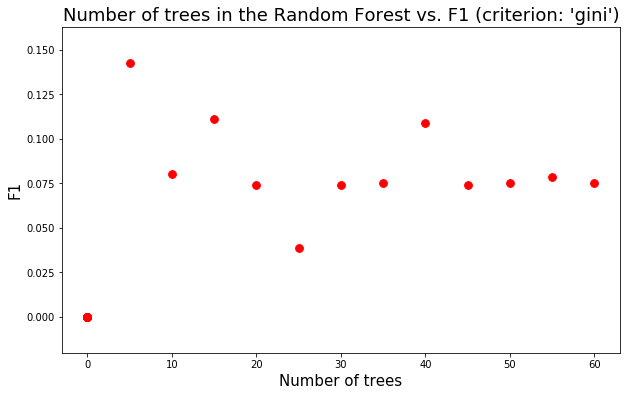

In [41]:
plt.figure(figsize=(10,6))
plt.scatter(x=ntree[1:nsimu],y=f1_cum[1:nsimu],s=60,c='red')
plt.title("Number of trees in the Random Forest vs. F1 (criterion: 'gini')", fontsize=18)
plt.xlabel("Number of trees", fontsize=15)
plt.ylabel("F1", fontsize=15)

## Logistic Regression Demo


$class sklearn.linear_model.LogisticRegression$(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='warn', max_iter=100, multi_class='warn', verbose=0, warm_start=False, n_jobs=None)


In [52]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(C=1.,tol=1e-4, max_iter=200,n_jobs=4, penalty='l1')

avg_p=0.
avg_r=0.
avg_f1=0.

for train_index, test_index in kf.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model.fit(X_train,y_train)
    
    y_pred = model.predict(X_test)
    
    p, r, f1, s = precision_recall_fscore_support(y_test, y_pred)
    
    avg_p += p[1]
    avg_r += r[1]
    avg_f1 += f1[1]

print(avg_p/5., avg_r/5., avg_f1/5.)

(0.2, 0.004651162790697674, 0.00909090909090909)


In [ ]:
nsimu=201
penalty=[0]*nsimu
logmodel=[0]*nsimu
predictions =[0]*nsimu
class_report = [0]*nsimu
f1=[0]*nsimu
for i in range(1,nsimu):
#         logmodel[i] =(LogisticRegression(C=i/1000,tol=1e-4, max_iter=100,n_jobs=4))
        logmodel[i].fit(X_train,y_train)
        predictions[i] = logmodel[i].predict(X_test)
        class_report[i] = classification_report(y_test,predictions[i])
        l=class_report[i].split()
        f1[i] = l[len(l)-2]
        penalty[i]=1000/i

plt.scatter(penalty[1:len(penalty)-2],f1[1:len(f1)-2])
plt.title("F1-score vs. regularization parameter",fontsize=20)
plt.xlabel("Penalty parameter",fontsize=17)
plt.ylabel("F1-score on test data",fontsize=17)
plt.show()